In [2]:
import warnings
import pandas as pd
import numpy as np

from IPython.display import IFrame
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go

import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt

#plt.style.use('seaborn-darkgrid')
import seaborn as sns

sns.set(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2)

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [4]:
df = pd.read_excel("superstore ham.xlsx")
df.head(5)

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,Profit,Unit_Price,ProfitperUnit,CostperUnit,PercentageofProfit,Unnamed: 22,Unnamed: 23,Order_Month,Order_Year,Tenure
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,41.91360,130.9800,20.9568,110.0232,19.0%,NaN,NaN,November,2016,2016-11-08
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,219.58200,243.9800,73.1940,170.7860,42.9%,NaN,NaN,November,2016,2016-11-08
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,6.87140,7.3100,3.4357,3.8743,88.7%,NaN,NaN,June,2016,2016-06-12
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,-172.60608,191.5155,-76.6062,268.1217,-28.6%,NaN,NaN,October,2015,2015-10-11
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,2.51640,11.1840,1.2582,9.9258,12.7%,NaN,NaN,October,2015,2015-10-11


In [20]:
numeric_columns = ['Sales', 'Quantity',
       'Discount', 'Profit', 'Unit_Price', 'ProfitperUnit', 'CostperUnit',
        'Order_Year']

In [22]:
df[numeric_columns].describe()

,Sales,Quantity,Discount,Profit,Unit_Price,ProfitperUnit,CostperUnit,Order_Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,192.475437,3.789574,0.156203,22.558454,60.919569,7.799372,53.120197,2015.722233
std,315.673698,2.225110,0.206452,66.677036,142.927440,56.074974,122.251398,1.123555
min,0.444000,1.000000,0.000000,-172.606080,0.336000,-1319.995600,0.544500,2014.000000
25%,17.280000,2.000000,0.000000,1.728750,5.470000,0.722800,3.473600,2015.000000
50%,54.490000,3.000000,0.200000,8.666500,16.270000,2.767000,12.933600,2016.000000
75%,209.940000,5.000000,0.200000,29.364000,63.940000,8.703200,54.522000,2017.000000
max,1419.919200,14.000000,0.800000,246.414240,3773.080000,1679.995200,4074.926400,2017.000000


In [14]:
numeric_columns

['Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Unit_Price',
 'ProfitperUnit',
 'CostperUnit',
 'Order_Year',
 'Decimal_Percentage']

In [71]:
df.info() #Kolonlarımıza ve data tiplerimize bakalım.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_ID            9994 non-null   object        
 1   Order_Date          9994 non-null   datetime64[ns]
 2   Shipment_Date       9994 non-null   datetime64[ns]
 3   Ship_Mode           9994 non-null   object        
 4   Customer_ID         9994 non-null   object        
 5   Customer_Name       9994 non-null   object        
 6   Segment             9994 non-null   object        
 7   City                9994 non-null   object        
 8   State               9994 non-null   object        
 9   Region              9994 non-null   object        
 10  Product_ID          9994 non-null   object        
 11  Category            9994 non-null   object        
 12  Sub_Category        9994 non-null   object        
 13  Product_Name        9994 non-null   object      

Data setimiz 9994 satır ve 25 sütundan oluşuyor ve boş verimiz görünmüyor. Datamızda numeric, categorical ve datetime veri tiplerimiz mevcuttur. 

In [72]:
df.nunique() #Data setimizin sütunlarında yer alan farklı verilerimizin sayısına bakalım. 

Order_ID              5009
Order_Date            1237
Shipment_Date         1334
Ship_Mode                4
Customer_ID            793
Customer_Name          793
Segment                  3
City                   531
State                   49
Region                   4
Product_ID            1862
Category                 3
Sub_Category            17
Product_Name          1850
Sales                 5589
Quantity                14
Discount                12
Profit                6831
Unit_Price            2665
ProfitperUnit         3522
CostperUnit           1584
PercentageofProfit     287
Order_Month             12
Order_Year               4
Tenure                1237
dtype: int64

Yukarıdaki listeden görülüyor ki 3 farklı segmentimiz (müşteri segmenti), 3 farklı ürün kategorimiz, 17 farklı alt ürün kategorimiz ve 1850 farklı ürünümüz bulunmaktadır. 
1850 farklı ürünümüz varken 1862 farklı product_id görünmektedir. Verinin bu kısmı kontrol edilecektir. 
Verimizde genel kontrolleri yapmadan önce ham halinin kopyasını alıp, kopyamızla ilerleyelim. 

In [73]:
df2=df.copy() #Verimizin kopyasını oluşturuyoruz. Artık df2 datamızla çalışacağız. 

In [74]:
df2.head(5)

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,Quantity,Discount,Profit,Unit_Price,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Tenure
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,2,0.00,41.91360,130.9800,20.9568,110.0232,19.0%,November,2016,2016-11-08
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,3,0.00,219.58200,243.9800,73.1940,170.7860,42.9%,November,2016,2016-11-08
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,2,0.00,6.87140,7.3100,3.4357,3.8743,88.7%,June,2016,2016-06-12
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,5,0.45,-172.60608,191.5155,-76.6062,268.1217,-28.6%,October,2015,2015-10-11
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,2,0.20,2.51640,11.1840,1.2582,9.9258,12.7%,October,2015,2015-10-11


Verimizde Sales rakamının Quantity*Unit Price formulü ile;
Profit rakamımızın ise [Sales - (Quantity-Unit Price)] formulü ile bulunduğunu biliyoruz. Rakamların doğruluğunu kontrol edelim. Bunun için yeni bir Sales_v2 kolonu ekleyelim. 

In [75]:
df2["Sales_v2"]= df2["Quantity"]*df2["Unit_Price"]

In [76]:
df2["Diff"] = df2["Sales"]- df2["Sales_v2"]

In [77]:
df2['Diff'] = df2['Diff'].astype(int)

In [78]:
sorted_df2 = df2.sort_values(by='Diff', ascending=True)

In [79]:
sorted_df2

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,Profit,Unit_Price,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Tenure,Sales_v2,Diff
810,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,South,...,-172.60608,3773.080,-301.8464,4074.9264,-7.4%,March,2014,2014-03-18,22638.480,-21218
6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,Central,...,246.41424,3499.990,1679.9952,1819.9948,92.3%,October,2016,2016-10-02,17499.950,-16080
8153,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,Seattle,Washington,West,...,246.41424,3499.990,1679.9952,1819.9948,92.3%,March,2017,2017-03-23,13999.960,-12580
2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,New York City,New York,East,...,246.41424,2799.992,979.9972,1819.9948,53.8%,October,2017,2017-10-22,11199.968,-9780
4190,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,Newark,Delaware,East,...,246.41424,3499.990,1679.9952,1819.9948,92.3%,November,2017,2017-11-17,10499.970,-9080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,CA-2015-161718,2015-12-04,2015-12-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Hempstead,New York,East,...,11.37600,9.480,3.7920,5.6880,66.7%,December,2015,2015-12-04,28.440,0
3375,CA-2015-161718,2015-12-04,2015-12-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Hempstead,New York,East,...,8.09800,72.882,1.6196,71.2624,2.3%,December,2015,2015-12-04,364.410,0
3376,CA-2015-161718,2015-12-04,2015-12-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,Hempstead,New York,East,...,10.38960,9.990,2.5974,7.3926,35.1%,December,2015,2015-12-04,39.960,0
3369,CA-2015-115511,2015-11-21,2015-11-25,Standard Class,NW-18400,Natalie Webber,Consumer,Las Vegas,Nevada,West,...,41.16840,70.980,20.5842,50.3958,40.8%,November,2015,2015-11-21,141.960,0


Görülüyor ki bizim unit_price*quantity formülü ile bulduğumuz Sales_v2 rakamı ile orjinal datamızdaki Sales rakamları arasında farklılar var. Bu farklar neden kaynaklanıyor bakalım. 

In [80]:
filtered_df2 = df2[df2['Diff'] != 0]

In [81]:
filtered_df2[["Sales", "Sales_v2", "Quantity","Unit_Price"]]

,Sales,Sales_v2,Quantity,Unit_Price
27,1419.9192,3083.430,7,440.490
149,1419.9192,1951.840,8,243.980
251,1419.9192,3347.370,13,257.490
306,1419.9192,2177.584,8,272.198
354,1419.9192,4355.168,4,1088.792
...,...,...,...,...
9823,1419.9192,1628.820,9,180.980
9858,1419.9192,3393.680,8,424.210
9930,1419.9192,2799.960,5,559.992
9948,1419.9192,1925.880,6,320.980


266 tane satırda Sales verilerimiz, unit price ve quantity rakamlarımız farklı olmasına rağmen aynı girilmiş. Sales verilerimiz Profit verilerimizi de etkilediğinden Profit verilerimizi de kontrol edelim. 

In [82]:
df2["Profit_v2"]=df2["Sales_v2"]- (df2["Quantity"]*df["CostperUnit"])

In [83]:
df2[["Profit","Profit_v2"]]

,Profit,Profit_v2
0,41.91360,41.9136
1,219.58200,219.5820
2,6.87140,6.8714
3,-172.60608,-383.0310
4,2.51640,2.5164
...,...,...
9989,2.19000,2.1900
9990,15.63320,15.6332
9991,19.39320,19.3932
9992,13.32000,13.3200


Profit_v2 ile Profit rakamları arasında da farklılıklar var. Biz ilerleyen kısımlarda analizlerimize Sales_v2 ve Profit_v2 rakamları ile devam edeceğiz. 

Profit per unit verimizi de kontrol edelim. 

In [84]:
df2["PPU"]= df2["Profit_v2"]/df2["Quantity"]

In [85]:
df2["PPU"].sum()

77946.92309999999

In [86]:
df2["ProfitperUnit"].sum()

77946.9231

Profit per unit verimizde bir yanlışlık yok. Son olarak percentage of profit rakamımızı da kontrol edelim. Profit per unit verimizde bir hata olmadığı için büyük olasılıkla percentage of profit verimiz de doğru olacaktır. 

In [87]:
df2['Decimal_Percentage'] = df2['PercentageofProfit'].str.replace('%', '').astype(float) / 100 #İşlem yapabilmemiz için veri tipini değiştiriyoruz. 

In [88]:
df2.head(5)

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Tenure,Sales_v2,Diff,Profit_v2,PPU,Decimal_Percentage
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,110.0232,19.0%,November,2016,2016-11-08,261.9600,0,41.9136,20.9568,0.190
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,170.7860,42.9%,November,2016,2016-11-08,731.9400,0,219.5820,73.1940,0.429
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,3.8743,88.7%,June,2016,2016-06-12,14.6200,0,6.8714,3.4357,0.887
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,268.1217,-28.6%,October,2015,2015-10-11,957.5775,0,-383.0310,-76.6062,-0.286
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,9.9258,12.7%,October,2015,2015-10-11,22.3680,0,2.5164,1.2582,0.127


In [89]:
df2["POP"]= df2["ProfitperUnit"]/df2["CostperUnit"]

In [90]:
df2[["POP", "Decimal_Percentage"]]

,POP,Decimal_Percentage
0,0.190476,0.190
1,0.428571,0.429
2,0.886792,0.887
3,-0.285714,-0.286
4,0.126761,0.127
...,...,...
9989,0.428571,0.429
9990,0.204819,0.205
9991,0.081081,0.081
9992,0.818182,0.818


In [91]:
df2["POP"].sum()

3235.8956885235975

In [92]:
df2["Decimal_Percentage"].sum()

3235.7070000000003

In [93]:
df2.head(5)

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,PercentageofProfit,Order_Month,Order_Year,Tenure,Sales_v2,Diff,Profit_v2,PPU,Decimal_Percentage,POP
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,19.0%,November,2016,2016-11-08,261.9600,0,41.9136,20.9568,0.190,0.190476
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,42.9%,November,2016,2016-11-08,731.9400,0,219.5820,73.1940,0.429,0.428571
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,88.7%,June,2016,2016-06-12,14.6200,0,6.8714,3.4357,0.887,0.886792
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,-28.6%,October,2015,2015-10-11,957.5775,0,-383.0310,-76.6062,-0.286,-0.285714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,12.7%,October,2015,2015-10-11,22.3680,0,2.5164,1.2582,0.127,0.126761


In [94]:
df2.columns

Index(['Order_ID', 'Order_Date', 'Shipment_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Region', 'Product_ID',
       'Category', 'Sub_Category', 'Product_Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Unit_Price', 'ProfitperUnit', 'CostperUnit',
       'PercentageofProfit', 'Order_Month', 'Order_Year', 'Tenure', 'Sales_v2',
       'Diff', 'Profit_v2', 'PPU', 'Decimal_Percentage', 'POP'],
      dtype='object')

Görülüyor ki Percantage of Profit verilerimiz de bir sıkıntı mevcut değil. O halde datayı gereksiz verilerden arındırmak için Sales, Profit, POP, PPU,Diff verileriden kurtamamız lazım. Bu verileri droplayalım ve kullanacağımız verilerle devam edelim.  

In [95]:
df2= df2.drop(columns=["Sales", "Profit", "POP", "PPU", "Diff"])

In [96]:
df2.head(5)

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,Unit_Price,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Tenure,Sales_v2,Profit_v2,Decimal_Percentage
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,130.9800,20.9568,110.0232,19.0%,November,2016,2016-11-08,261.9600,41.9136,0.190
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,243.9800,73.1940,170.7860,42.9%,November,2016,2016-11-08,731.9400,219.5820,0.429
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,7.3100,3.4357,3.8743,88.7%,June,2016,2016-06-12,14.6200,6.8714,0.887
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,191.5155,-76.6062,268.1217,-28.6%,October,2015,2015-10-11,957.5775,-383.0310,-0.286
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,11.1840,1.2582,9.9258,12.7%,October,2015,2015-10-11,22.3680,2.5164,0.127


In [97]:
df2.duplicated().sum() #duplicate verilerimiz var mı?

1

In [98]:
df2[df2.duplicated()]

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,Unit_Price,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Tenure,Sales_v2,Profit_v2,Decimal_Percentage
1175,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,...,140.686,-6.0294,146.7154,-4.1%,April,2014,2014-04-23,281.372,-12.0588,-0.041


In [99]:
df2.drop_duplicates()

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,Unit_Price,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Tenure,Sales_v2,Profit_v2,Decimal_Percentage
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,130.9800,20.9568,110.0232,19.0%,November,2016,2016-11-08,261.9600,41.9136,0.190
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,243.9800,73.1940,170.7860,42.9%,November,2016,2016-11-08,731.9400,219.5820,0.429
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,7.3100,3.4357,3.8743,88.7%,June,2016,2016-06-12,14.6200,6.8714,0.887
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,191.5155,-76.6062,268.1217,-28.6%,October,2015,2015-10-11,957.5775,-383.0310,-0.286
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,11.1840,1.2582,9.9258,12.7%,October,2015,2015-10-11,22.3680,2.5164,0.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,New Rochelle,New York,East,...,3.6500,1.0950,2.5550,42.9%,November,2014,2014-11-11,7.3000,2.1900,0.429
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,...,45.9800,7.8166,38.1634,20.5%,February,2017,2017-02-26,91.9600,15.6332,0.205
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,...,129.2880,9.6966,119.5914,8.1%,February,2017,2017-02-26,258.5760,19.3932,0.081
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,...,7.4000,3.3300,4.0700,81.8%,February,2017,2017-02-26,29.6000,13.3200,0.818


Tenure'umuzu düzeltelim. Bunun için max ve min order date kolonları oluşturalım. Verimizde son günümüz 29.12.2017, tenure'u 30.12.2017 üzerinden hesaplayalım. 




In [100]:
min_dates = df2.groupby('Customer_ID')['Order_Date'].transform('min')
df2['Min_Order_Date'] = min_dates

In [101]:
df2.head()

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Tenure,Sales_v2,Profit_v2,Decimal_Percentage,Min_Order_Date
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,20.9568,110.0232,19.0%,November,2016,2016-11-08,261.9600,41.9136,0.190,2015-10-15
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,73.1940,170.7860,42.9%,November,2016,2016-11-08,731.9400,219.5820,0.429,2015-10-15
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,3.4357,3.8743,88.7%,June,2016,2016-06-12,14.6200,6.8714,0.887,2016-06-12
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,-76.6062,268.1217,-28.6%,October,2015,2015-10-11,957.5775,-383.0310,-0.286,2015-10-11
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,1.2582,9.9258,12.7%,October,2015,2015-10-11,22.3680,2.5164,0.127,2015-10-11


In [102]:
df2 = df2.drop(columns=['Tenure'])

In [103]:
df2["Tenure"]= (df2["Order_Date"].max())-df2["Min_Order_Date"]

In [104]:
df2.head(5)

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Sales_v2,Profit_v2,Decimal_Percentage,Min_Order_Date,Tenure
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,20.9568,110.0232,19.0%,November,2016,261.9600,41.9136,0.190,2015-10-15,807 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,73.1940,170.7860,42.9%,November,2016,731.9400,219.5820,0.429,2015-10-15,807 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,...,3.4357,3.8743,88.7%,June,2016,14.6200,6.8714,0.887,2016-06-12,566 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,-76.6062,268.1217,-28.6%,October,2015,957.5775,-383.0310,-0.286,2015-10-11,811 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,...,1.2582,9.9258,12.7%,October,2015,22.3680,2.5164,0.127,2015-10-11,811 days


Şimdi product id ve product name ile ilgili sorunlarımızla ilgilenelim. Her bir product id için ayrı bir product name olması gerekiyorken; bir product id için farlı product nameler olduğunu, yada tersine bir product name için farklı product idler olduğunu keşfettik. 

In [105]:
df2_product = df2[["Product_ID", "Product_Name"]]

In [106]:
# Birden fazla farklı product_name ile eşleşen product_id'leri bulma
product_id_groups = df2_product.groupby('Product_ID').filter(lambda x: x['Product_Name'].nunique() > 1)
product_id_groups = product_id_groups.sort_values(by='Product_ID').drop_duplicates()

# Birden fazla farklı product_id ile eşleşen product_name'leri bulma
product_name_groups = df2_product.groupby('Product_Name').filter(lambda x: x['Product_ID'].nunique() > 1)
product_name_groups = product_name_groups.sort_values(by='Product_Name').drop_duplicates()

# Sonuçları gösterme
print("Birden fazla farklı product_name ile eşleşen product_id'ler:")
print(product_id_groups)

print("\nBirden fazla farklı product_id ile eşleşen product_name'ler:")
print(product_name_groups)


Birden fazla farklı product_name ile eşleşen product_id'ler:
           Product_ID                                       Product_Name
9584  FUR-BO-10002213              DMI Eclipse Executive Suite Bookcases
2471  FUR-BO-10002213   Sauder Forest Hills Library, Woodland Oak Finish
2003  FUR-CH-10001146        Global Value Mid-Back Manager's Chair, Gray
8457  FUR-CH-10001146                           Global Task Chair, Black
7135  FUR-FU-10001473                            DAX Wood Document Frame
...               ...                                                ...
1222  TEC-PH-10002200                              Samsung Galaxy Note 2
2596  TEC-PH-10002310  Plantronics Calisto P620-M USB Wireless Speake...
9927  TEC-PH-10002310                 Panasonic KX T7731-B Digital phone
924   TEC-PH-10004531      OtterBox Commuter Series Case - iPhone 5 & 5s
4831  TEC-PH-10004531                                        AT&T CL2909

[64 rows x 2 columns]

Birden fazla farklı product_id ile eşle

Burada product id ve product nameleri tekilleştirmemiz gerekmekte. Her bir product id'nin farklı bir product name'i; her bir product name'in farklı bir product id'si olmalı. Biz burada bir product name'in birden fazla product id'si olması durumunda en küçük product id'yi doğru id olarak kabul edeceğiz. Aynı şekilde bir product id'nin birden fazla product name'i varsa en küçük product name'i doğru olarak kabul edeceğiz. 

In [107]:
min_ids = df2.groupby('Product_Name')['Product_ID'].min().reset_index()

# Product_Name ile birleştirme yaparak Product_ID'leri güncelleme
df3 = df2.merge(min_ids, on='Product_Name', suffixes=('', '_min'))
df3['Product_ID'] = df3['Product_ID_min']
df3 = df3.drop(columns=['Product_ID_min'])

In [108]:
df3["Product_ID"]

0       FUR-BO-10001798
1       FUR-BO-10001798
2       FUR-BO-10001798
3       FUR-BO-10001798
4       FUR-CH-10000454
             ...       
9989    TEC-AC-10002380
9990    TEC-MA-10003589
9991    OFF-AP-10003099
9992    TEC-PH-10002645
9993    OFF-ST-10001627
Name: Product_ID, Length: 9994, dtype: object

In [109]:
duplicates = df3.groupby('Product_Name')['Product_ID'].nunique()
duplicates = duplicates[duplicates > 1]
print(duplicates)

Series([], Name: Product_ID, dtype: int64)


In [110]:

min_names = df3.groupby('Product_ID')['Product_Name'].min().reset_index()

df3 = df3.merge(min_names, on='Product_ID', suffixes=('', '_min'))
df3['Product_Name'] = df3['Product_Name_min']
df3 = df3.drop(columns=['Product_Name_min'])

In [111]:
duplicates = df3.groupby('Product_ID')['Product_Name'].nunique()
duplicates = duplicates[duplicates > 1]
print(duplicates)

Series([], Name: Product_Name, dtype: int64)


In [112]:
df3

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Sales_v2,Profit_v2,Decimal_Percentage,Min_Order_Date,Tenure
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,20.9568,110.0232,19.0%,November,2016,261.960,41.9136,0.190,2015-10-15,807 days
1,CA-2016-117681,2016-04-09,2016-04-14,Standard Class,HF-14995,Herbert Flentye,Consumer,Los Angeles,California,West,...,1.3098,110.0232,1.2%,April,2016,556.665,6.5490,0.012,2014-05-26,1314 days
2,CA-2017-159793,2017-08-25,2017-08-29,Standard Class,SV-20365,Seth Vernon,Consumer,Philadelphia,Pennsylvania,East,...,-44.5332,110.0232,-40.5%,August,2017,130.980,-89.0664,-0.405,2014-01-11,1449 days
3,CA-2017-110198,2017-05-01,2017-05-02,First Class,AG-10900,Arthur Gainer,Consumer,Coral Springs,Florida,South,...,-5.2392,110.0232,-4.8%,May,2017,314.352,-15.7176,-0.048,2014-07-23,1256 days
4,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,73.1940,170.7860,42.9%,November,2016,731.940,219.5820,0.429,2015-10-15,807 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-151855,2017-05-27,2017-06-03,Standard Class,BW-11110,Bart Watters,Corporate,Greensboro,North Carolina,South,...,0.1133,8.9507,1.3%,May,2017,27.192,0.3399,0.013,2015-03-20,1016 days
9990,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,Newark,Ohio,East,...,-54.9846,129.9636,-42.3%,May,2016,224.937,-164.9538,-0.423,2016-05-03,606 days
9991,CA-2015-138625,2015-11-02,2015-11-05,First Class,EG-13900,Emily Grady,Consumer,Chesapeake,Virginia,South,...,13.8404,35.5896,38.9%,November,2015,197.720,55.3616,0.389,2015-11-02,789 days
9992,CA-2016-114867,2016-12-23,2016-12-28,Standard Class,FM-14290,Frank Merwin,Home Office,Philadelphia,Pennsylvania,East,...,-74.9985,374.9925,-20.0%,December,2016,1499.970,-374.9925,-0.200,2014-08-26,1222 days


df3 bizim edaya hazır verimizdir. Bunun kopyasını alalım ve excele aktaralım. 

In [113]:
df4=df3.copy() #Artık df4 üzerinde ilerleyeceğiz. 

In [114]:
df3.to_csv('20240613_EDA.csv', index=False)

In [115]:
df4.columns
for col in df4.columns:
    print(col)

Order_ID
Order_Date
Shipment_Date
Ship_Mode
Customer_ID
Customer_Name
Segment
City
State
Region
Product_ID
Category
Sub_Category
Product_Name
Quantity
Discount
Unit_Price
ProfitperUnit
CostperUnit
PercentageofProfit
Order_Month
Order_Year
Sales_v2
Profit_v2
Decimal_Percentage
Min_Order_Date
Tenure


In [116]:
df4.dtypes

Order_ID                       object
Order_Date             datetime64[ns]
Shipment_Date          datetime64[ns]
Ship_Mode                      object
Customer_ID                    object
Customer_Name                  object
Segment                        object
City                           object
State                          object
Region                         object
Product_ID                     object
Category                       object
Sub_Category                   object
Product_Name                   object
Quantity                        int64
Discount                      float64
Unit_Price                    float64
ProfitperUnit                 float64
CostperUnit                   float64
PercentageofProfit             object
Order_Month                    object
Order_Year                      int64
Sales_v2                      float64
Profit_v2                     float64
Decimal_Percentage            float64
Min_Order_Date         datetime64[ns]
Tenure      

In [117]:
numeric_columns = ['Sales_v2', 'Quantity',
       'Discount', 'Profit_v2', 'Unit_Price', 'ProfitperUnit', 'CostperUnit',
        'Order_Year','Decimal_Percentage']
categoric_columns = ['Order_ID', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Region',
       'Product_ID', 'Category', 'Sub_Category', 'Product_Name','Order_Month', 'PercentageofProfit']
stat_descriptive_stats = df4[numeric_columns].describe()
stat_descriptive_stats


,Sales_v2,Quantity,Discount,Profit_v2,Unit_Price,ProfitperUnit,CostperUnit,Order_Year,Decimal_Percentage
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,60.919569,7.799372,53.120197,2015.722233,0.323765
std,623.245101,2.225110,0.206452,234.260108,142.927440,56.074974,122.251398,1.123555,0.412141
min,0.444000,1.000000,0.000000,-6599.978000,0.336000,-1319.995600,0.544500,2014.000000,-0.733000
25%,17.280000,2.000000,0.000000,1.728750,5.470000,0.722800,3.473600,2015.000000,0.081000
50%,54.490000,3.000000,0.200000,8.666500,16.270000,2.767000,12.933600,2016.000000,0.370000
75%,209.940000,5.000000,0.200000,29.364000,63.940000,8.703200,54.522000,2017.000000,0.569000
max,22638.480000,14.000000,0.800000,8399.976000,3773.080000,1679.995200,4074.926400,2017.000000,1.000000


In [118]:
df4

,Order_ID,Order_Date,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Sales_v2,Profit_v2,Decimal_Percentage,Min_Order_Date,Tenure
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,20.9568,110.0232,19.0%,November,2016,261.960,41.9136,0.190,2015-10-15,807 days
1,CA-2016-117681,2016-04-09,2016-04-14,Standard Class,HF-14995,Herbert Flentye,Consumer,Los Angeles,California,West,...,1.3098,110.0232,1.2%,April,2016,556.665,6.5490,0.012,2014-05-26,1314 days
2,CA-2017-159793,2017-08-25,2017-08-29,Standard Class,SV-20365,Seth Vernon,Consumer,Philadelphia,Pennsylvania,East,...,-44.5332,110.0232,-40.5%,August,2017,130.980,-89.0664,-0.405,2014-01-11,1449 days
3,CA-2017-110198,2017-05-01,2017-05-02,First Class,AG-10900,Arthur Gainer,Consumer,Coral Springs,Florida,South,...,-5.2392,110.0232,-4.8%,May,2017,314.352,-15.7176,-0.048,2014-07-23,1256 days
4,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,73.1940,170.7860,42.9%,November,2016,731.940,219.5820,0.429,2015-10-15,807 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-151855,2017-05-27,2017-06-03,Standard Class,BW-11110,Bart Watters,Corporate,Greensboro,North Carolina,South,...,0.1133,8.9507,1.3%,May,2017,27.192,0.3399,0.013,2015-03-20,1016 days
9990,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,Newark,Ohio,East,...,-54.9846,129.9636,-42.3%,May,2016,224.937,-164.9538,-0.423,2016-05-03,606 days
9991,CA-2015-138625,2015-11-02,2015-11-05,First Class,EG-13900,Emily Grady,Consumer,Chesapeake,Virginia,South,...,13.8404,35.5896,38.9%,November,2015,197.720,55.3616,0.389,2015-11-02,789 days
9992,CA-2016-114867,2016-12-23,2016-12-28,Standard Class,FM-14290,Frank Merwin,Home Office,Philadelphia,Pennsylvania,East,...,-74.9985,374.9925,-20.0%,December,2016,1499.970,-374.9925,-0.200,2014-08-26,1222 days


In [119]:
df5=df4.copy()

In [120]:
df5['Order_Date'] = pd.to_datetime(df5['Order_Date'])
df5.set_index('Order_Date', inplace=True)

# Resample data to show quarterly values
quarterly_data = df5.resample('Q').sum()

# Create an interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=quarterly_data.index,
    y=quarterly_data['Sales_v2'],
    mode='lines+markers',
    name='Sales',
    text=[f'Sales: {value}' for value in quarterly_data['Sales_v2']],
    hoverinfo='text'
))

fig.add_trace(go.Scatter(
    x=quarterly_data.index,
    y=quarterly_data['Profit_v2'],
    mode='lines+markers',
    name='Profit',
    text=[f'Profit: {value}' for value in quarterly_data['Profit_v2']],
    hoverinfo='text'
))

fig.update_layout(
    title='Quarterly Sales and Profit',
    xaxis_title='Quarter',
    yaxis_title='Amount',
    xaxis=dict(tickvals=quarterly_data.index, ticktext=[f'{date.year}-Q{date.quarter}' for date in quarterly_data.index]),
    hovermode='x unified'
)

fig.show()


Yukarıdaki grafikten anlıyoruz ki Q4te satışlarımız en yüksek. Q1de ise en düşük. 

In [121]:
# İndeksi sıfırlama ve tekrar sütun haline getirme
df5.reset_index(inplace=True)


In [122]:
df5

,Order_Date,Order_ID,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Sales_v2,Profit_v2,Decimal_Percentage,Min_Order_Date,Tenure
0,2016-11-08,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,20.9568,110.0232,19.0%,November,2016,261.960,41.9136,0.190,2015-10-15,807 days
1,2016-04-09,CA-2016-117681,2016-04-14,Standard Class,HF-14995,Herbert Flentye,Consumer,Los Angeles,California,West,...,1.3098,110.0232,1.2%,April,2016,556.665,6.5490,0.012,2014-05-26,1314 days
2,2017-08-25,CA-2017-159793,2017-08-29,Standard Class,SV-20365,Seth Vernon,Consumer,Philadelphia,Pennsylvania,East,...,-44.5332,110.0232,-40.5%,August,2017,130.980,-89.0664,-0.405,2014-01-11,1449 days
3,2017-05-01,CA-2017-110198,2017-05-02,First Class,AG-10900,Arthur Gainer,Consumer,Coral Springs,Florida,South,...,-5.2392,110.0232,-4.8%,May,2017,314.352,-15.7176,-0.048,2014-07-23,1256 days
4,2016-11-08,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,73.1940,170.7860,42.9%,November,2016,731.940,219.5820,0.429,2015-10-15,807 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2017-05-27,CA-2017-151855,2017-06-03,Standard Class,BW-11110,Bart Watters,Corporate,Greensboro,North Carolina,South,...,0.1133,8.9507,1.3%,May,2017,27.192,0.3399,0.013,2015-03-20,1016 days
9990,2016-05-03,CA-2016-129280,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,Newark,Ohio,East,...,-54.9846,129.9636,-42.3%,May,2016,224.937,-164.9538,-0.423,2016-05-03,606 days
9991,2015-11-02,CA-2015-138625,2015-11-05,First Class,EG-13900,Emily Grady,Consumer,Chesapeake,Virginia,South,...,13.8404,35.5896,38.9%,November,2015,197.720,55.3616,0.389,2015-11-02,789 days
9992,2016-12-23,CA-2016-114867,2016-12-28,Standard Class,FM-14290,Frank Merwin,Home Office,Philadelphia,Pennsylvania,East,...,-74.9985,374.9925,-20.0%,December,2016,1499.970,-374.9925,-0.200,2014-08-26,1222 days


In [123]:

df5['Order_Date'] = pd.to_datetime(df5['Order_Date'])
df5.set_index('Order_Date', inplace=True)

# Çeyrek bazında gruplandırma
quarterly_data = df5.groupby('Category').resample('Q').sum().reset_index()

# Plotly ile etkileşimli grafik oluşturma
fig = px.line(
    quarterly_data,
    x='Order_Date',
    y='Sales_v2',
    color='Category',
    labels={'Order_Date': 'Tarih', 'Sales_v2': 'Satış Miktarı'},
    title='Çeyreklik Satış Değişimleri (2015-2017)'
)

# Grafiği gösterme
fig.show()


Yukarıdaki grafikten görüldüğü üzere teknoloji kategorisindeki satışımız en fazla; bu kategoriden sonra furniture geliyor. Office supplies ise satışlarımızın en düşük olduğu ana kategoridir. Ancak dip toplamda office supplies ve furniture ana gruplarının satışı birbirine yakın görünmektedir.

In [124]:
df5.reset_index(inplace=True)

In [125]:
df5

,Order_Date,Order_ID,Shipment_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,...,ProfitperUnit,CostperUnit,PercentageofProfit,Order_Month,Order_Year,Sales_v2,Profit_v2,Decimal_Percentage,Min_Order_Date,Tenure
0,2016-11-08,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,20.9568,110.0232,19.0%,November,2016,261.960,41.9136,0.190,2015-10-15,807 days
1,2016-04-09,CA-2016-117681,2016-04-14,Standard Class,HF-14995,Herbert Flentye,Consumer,Los Angeles,California,West,...,1.3098,110.0232,1.2%,April,2016,556.665,6.5490,0.012,2014-05-26,1314 days
2,2017-08-25,CA-2017-159793,2017-08-29,Standard Class,SV-20365,Seth Vernon,Consumer,Philadelphia,Pennsylvania,East,...,-44.5332,110.0232,-40.5%,August,2017,130.980,-89.0664,-0.405,2014-01-11,1449 days
3,2017-05-01,CA-2017-110198,2017-05-02,First Class,AG-10900,Arthur Gainer,Consumer,Coral Springs,Florida,South,...,-5.2392,110.0232,-4.8%,May,2017,314.352,-15.7176,-0.048,2014-07-23,1256 days
4,2016-11-08,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,...,73.1940,170.7860,42.9%,November,2016,731.940,219.5820,0.429,2015-10-15,807 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2017-05-27,CA-2017-151855,2017-06-03,Standard Class,BW-11110,Bart Watters,Corporate,Greensboro,North Carolina,South,...,0.1133,8.9507,1.3%,May,2017,27.192,0.3399,0.013,2015-03-20,1016 days
9990,2016-05-03,CA-2016-129280,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,Newark,Ohio,East,...,-54.9846,129.9636,-42.3%,May,2016,224.937,-164.9538,-0.423,2016-05-03,606 days
9991,2015-11-02,CA-2015-138625,2015-11-05,First Class,EG-13900,Emily Grady,Consumer,Chesapeake,Virginia,South,...,13.8404,35.5896,38.9%,November,2015,197.720,55.3616,0.389,2015-11-02,789 days
9992,2016-12-23,CA-2016-114867,2016-12-28,Standard Class,FM-14290,Frank Merwin,Home Office,Philadelphia,Pennsylvania,East,...,-74.9985,374.9925,-20.0%,December,2016,1499.970,-374.9925,-0.200,2014-08-26,1222 days


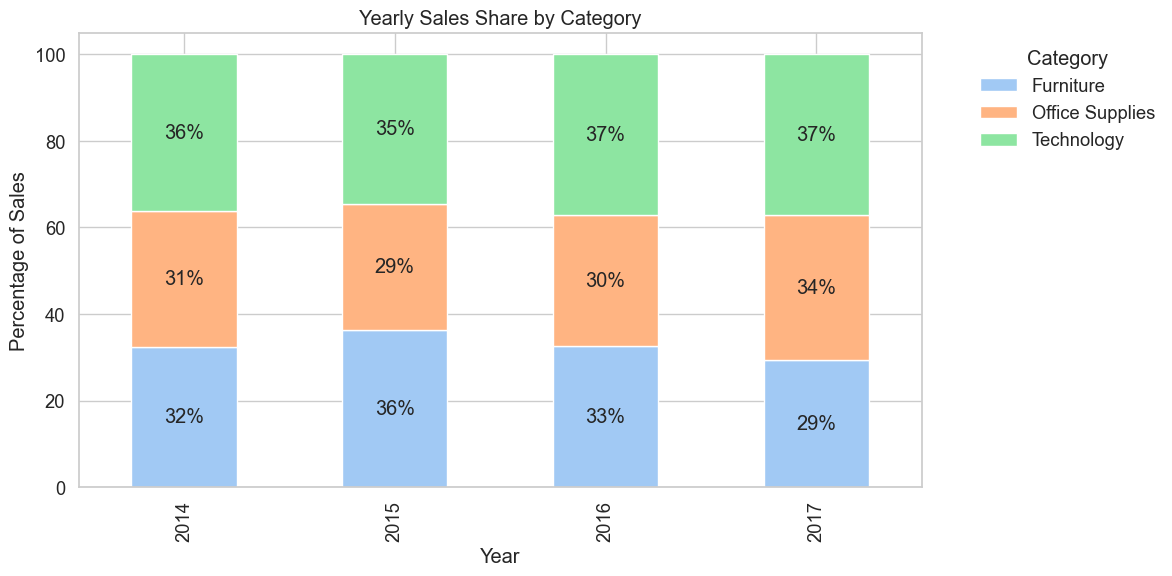

In [126]:
# Yıl ve kategori bazında satışları grupla
sales_data = df5.groupby(['Order_Year', 'Category'])['Sales_v2'].sum().unstack()

# Kategoriler bazında yıllık satış paylarını hesapla
sales_percentage = sales_data.divide(sales_data.sum(axis=1), axis=0) * 100

# Grafiği oluştur
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar chart oluştur
bars = sales_percentage.plot(kind='bar', stacked=True, ax=ax)

# Değerleri grafik üzerinde göster
for bar in bars.containers:
    labels = [f'{v:.0f}%' for v in bar.datavalues]
    ax.bar_label(bar, labels=labels, label_type='center')

# Grafiği düzenle
plt.title('Yearly Sales Share by Category')
plt.xlabel('Year')
plt.ylabel('Percentage of Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Yıllar içinde furniture kategorimizin satışlarımız içindeki payı azalmışken office supplies artmış. Aşağıdaki tabloya baktığımızda office supply ürünlerinin ortalama olarak daha ucuzken furniturein daha yüksek olduğunu görüyoruz. Dolayısıyla bu durum yani furniturein payının azalıp office supply kategorisinin artması satış gelirlerimizi negatif yönde etkiyor. Ancak tam tersi karlılığı pozitif yönde etkiliyor.  

In [127]:
a0=pd.DataFrame(df5.groupby(["Category"])["Quantity", "Sales_v2","Profit_v2"].sum())
a0["Unit_Sales_Price_of_Categories"]=a0["Sales_v2"]/a0["Quantity"]
a0["Unit_Profit_of_Categories"]=a0["Profit_v2"]/a0["Quantity"]
a0

,Quantity,Sales_v2,Profit_v2,Unit_Sales_Price_of_Categories,Unit_Profit_of_Categories
Category,,,,,
Furniture,8028,741999.7953,18451.2728,92.426482,2.298365
Office Supplies,22906,719047.0320,122490.8008,31.391209,5.347542
Technology,6939,836154.0330,145454.9481,120.500653,20.961947


In [128]:
a2=pd.DataFrame(df5.groupby(["Category", "Sub_Category"])["Quantity", "Sales_v2","Profit_v2"].sum())
a2["average_sales_price"]=a2["Sales_v2"]/a2["Quantity"]
a2["average_profit_price"]=a2["Profit_v2"]/a2["Quantity"]
a2

Quantity     Sales_v2   Profit_v2  \
Category        Sub_Category                                      
Furniture       Bookcases          868  114879.9963  -3472.5560   
                Chairs            2356  328449.1030  26590.1663   
                Furnishings       3563   91705.1640  13059.1436   
                Tables            1241  206965.5320 -17725.4811   
Office Supplies Appliances        1729  107532.1610  18138.0054   
                Art               3000   27118.7920   6527.7870   
                Binders           5974  203412.7330  30221.7633   
                Envelopes          906   16476.4020   6964.1767   
                Fasteners          914    3024.2800    949.5182   
                Labels            1400   12486.3120   5546.2540   
                Paper             5178   78479.2060  34053.5693   
                Storage           3158  223843.6080  21278.8264   
                Supplies           647   46673.5380  -1189.0995   
Technology      Accessories       2976  167380.3180  41936.6357   
                Copiers            234  149528.0300  55617.8249   
                Machines           440  189238.6310   3384.7569   
                Phones            3289  330007.0540  44515.7306   

                              average_sales_price  average_profit_price  
Category        Sub_Category                                             
Furniture       Bookcases              132.350226             -4.000641  
                Chairs                 139.409636             11.286149  
                Furnishings             25.738188              3.665210  
                Tables                 166.773193            -14.283224  
Office Supplies Appliances              62.193268             10.490460  
                Art                      9.039597              2.175929  
                Binders                 34.049671              5.058882  
                Envelopes               18.185874              7.686729  
                Fasteners                3.308840              1.038860  
                Labels                   8.918794              3.961610  
                Paper                   15.156278              6.576587  
                Storage                 70.881446              6.738070  
                Supplies                72.138389             -1.837866  
Technology      Accessories             56.243386             14.091611  
                Copiers                639.008675            237.683012  
                Machines               430.087798              7.692629  
                Phones                 100.336593             13.534731

In [129]:
result = []

for year in sorted(df5['Order_Year'].unique()):
    df_year = df5[df5['Order_Year'] == year]
    a1 = pd.DataFrame(df_year[["Quantity", "Sales_v2", "Profit_v2"]].sum()).transpose()
    a1["Unit_Sales_Price"] = a1["Sales_v2"] / a1["Quantity"]
    a1["Unit_Profit"] = a1["Profit_v2"] / a1["Quantity"]
    a1.insert(0, 'Year', year)
    result.append(a1)

result_df = pd.concat(result)
result_df = result_df.reset_index(drop=True)

# Sütunları istediğiniz sıraya göre yeniden düzenleme
columns_order = ['Year', 'Quantity', 'Sales_v2', 'Profit_v2', 'Unit_Sales_Price', 'Unit_Profit']
result_df = result_df[columns_order]


In [130]:
result_df

,Year,Quantity,Sales_v2,Profit_v2,Unit_Sales_Price,Unit_Profit
0,2014,7581.0,484247.4981,49543.9741,63.876467,6.535282
1,2015,7979.0,470532.5090,61618.6037,58.971363,7.722597
2,2016,9837.0,609205.5980,81795.1743,61.930019,8.315053
3,2017,12476.0,733215.2552,93439.2696,58.770059,7.489521


Şimdi bunu yıl kırılımına bölelim. 

In [131]:
result = []

for year in sorted(df5['Order_Year'].unique()):
    df_year = df5[df5['Order_Year'] == year]
    a2 = pd.DataFrame(df_year.groupby(["Category"])["Quantity", "Sales_v2", "Profit_v2"].sum())
    a2["Unit_Sales_Price_of_Categories"] = a2["Sales_v2"] / a2["Quantity"]
    a2["Unit_Profit_of_Categories"] = a2["Profit_v2"] / a2["Quantity"]
    a2.insert(0, 'Year', year)
    result.append(a2)

result_df2 = pd.concat(result)
result_df2 = result_df2.reset_index()

# Sütunları istediğiniz sıraya göre yeniden düzenleme
columns_order = ['Year', 'Category', 'Quantity', 'Sales_v2', 'Profit_v2', 'Unit_Sales_Price_of_Categories', 'Unit_Profit_of_Categories']
result_df2 = result_df2[columns_order]


In [132]:
result_df2

,Year,Category,Quantity,Sales_v2,Profit_v2,Unit_Sales_Price_of_Categories,Unit_Profit_of_Categories
0,2014,Furniture,1623,157192.8531,5457.7255,96.853267,3.362739
1,2014,Office Supplies,4569,151776.4120,22593.4161,33.218738,4.944937
2,2014,Technology,1389,175278.2330,21492.8325,126.190233,15.473602
3,2015,Furniture,1775,170518.2370,3015.2029,96.066612,1.698706
4,2015,Office Supplies,4715,137233.4630,25099.5338,29.105719,5.323337
5,2015,Technology,1489,162780.8090,33503.8670,109.322236,22.500918
6,2016,Furniture,2193,198901.4360,6959.9531,90.698329,3.173713
7,2016,Office Supplies,5946,183939.9820,35061.2292,30.935079,5.896608
8,2016,Technology,1698,226364.1800,39773.9920,133.312238,23.424024
9,2017,Furniture,2437,215387.2692,3018.3913,88.382138,1.238568


Ürün kategorilerimizi, subcategorilerimizi ve müşteri sayılarımızı listeyelim. 

In [133]:
pd.DataFrame(df5.groupby(["Category", "Sub_Category"])["Customer_ID"].nunique().drop_duplicates()) #number of customers

Customer_ID
Category        Sub_Category             
Furniture       Bookcases             195
                Chairs                407
                Furnishings           528
                Tables                261
Office Supplies Appliances            356
                Art                   494
                Binders               650
                Envelopes             206
                Fasteners             191
                Labels                281
                Paper                 611
                Storage               514
                Supplies              160
Technology      Accessories           474
                Copiers                64
                Machines               99
                Phones                511

In [134]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [135]:
# Create new column with State Abbreviations
df4['State_abb'] = df4['State'].replace(us_state_to_abbrev)

# Plot
fig7 = go.Figure(data=go.Choropleth(
    locations= df4['State_abb'].value_counts().index, # Spatial coordinates
    z = df4['State_abb'].value_counts(), # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'teal', zmin = 1, zmax = 1000
))

fig7.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Customers by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig7.show()

In [136]:
Discountmade_general5 = df4.groupby(['State_abb']).agg({'Sales_v2': ['sum']}).reset_index()
Discountmade_general5.columns = ['State_abb', 'Sales_v2']

# Haritayı oluşturmak için Plotly Express kullanacağız
fig = px.choropleth(
    Discountmade_general5,
    locations='State_abb',  # Eyaletlerin yerini belirtir
    locationmode="USA-states",  # ABD eyaletlerini göster
    color='Sales_v2',  # Yoğunluğu gösterecek sütun
    color_continuous_scale="Viridis",  # Renk skalası
    scope="usa",  # Sadece ABD haritasını göster
    labels={'Sales_v2': 'Toplam Satis'},
    title='Eyaletlere Göre Toplam Satış Dağılımı'
)

# Harita tasarımını güncelleyelim
fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',  # Göl renklerini beyaz yap
    ),
    title_x=0.5,  # Başlığı ortala
    margin={"r":0,"t":40,"l":0,"b":0}  # Kenar boşluklarını ayarla
)

# Haritayı göster
fig.show()

In [137]:
Discountmade_general5 = df4.groupby(['State_abb']).agg({'Profit_v2': ['sum']}).reset_index()
Discountmade_general5.columns = ['State_abb', 'Profit_v2']

# Haritayı oluşturmak için Plotly Express kullanacağız
fig = px.choropleth(
    Discountmade_general5,
    locations='State_abb',  # Eyaletlerin yerini belirtir
    locationmode="USA-states",  # ABD eyaletlerini göster
    color='Profit_v2',  # Yoğunluğu gösterecek sütun
    color_continuous_scale="Viridis",  # Renk skalası
    scope="usa",  # Sadece ABD haritasını göster
    labels={'Profit_v2': 'Toplam Satis'},
    title='Eyaletlere Göre Toplam Kar Dağılımı'
)

# Harita tasarımını güncelleyelim
fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',  # Göl renklerini beyaz yap
    ),
    title_x=0.5,  # Başlığı ortala
    margin={"r":0,"t":40,"l":0,"b":0}  # Kenar boşluklarını ayarla
)

# Haritayı göster
fig.show()

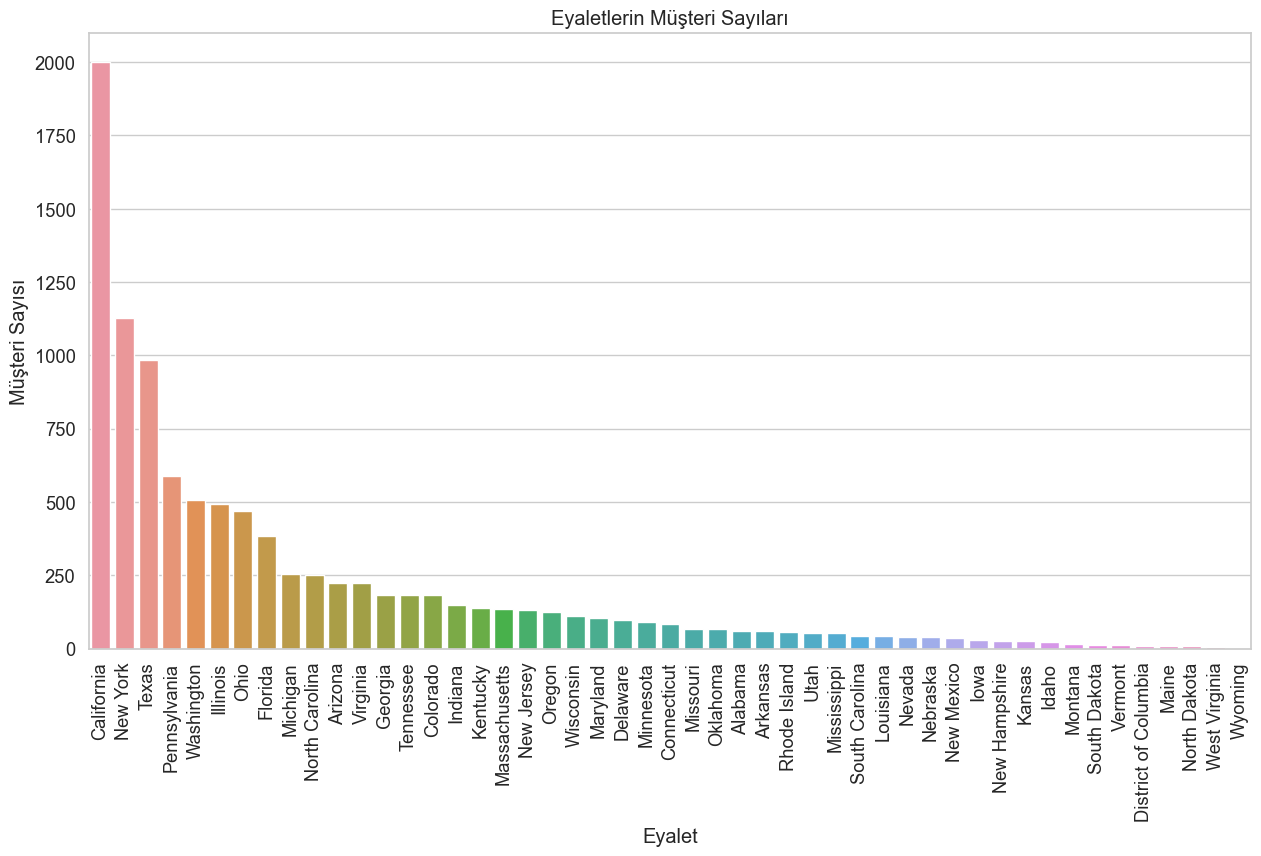

In [138]:
# Her bir eyalet için farklı müşteri sayısını hesapla
state_customer_counts = df4['State'].value_counts().reset_index()
state_customer_counts.columns = ['State', 'Customer_Count']

# Görselleştirme
plt.figure(figsize=(15, 8))
sns.barplot(x='State', y='Customer_Count', data=state_customer_counts)
plt.xticks(rotation=90)
plt.title('Eyaletlerin Müşteri Sayıları')
plt.xlabel('Eyalet')
plt.ylabel('Müşteri Sayısı')
plt.show()


In [139]:
cat_descriptive_stats = df4[categoric_columns].describe()
cat_descriptive_stats

,Order_ID,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Order_Month,PercentageofProfit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,531,49,4,1818,3,17,1818,12,287
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,New York City,California,West,OFF-EN-10001028,Office Supplies,Binders,Staple envelope,November,92.3%
freq,14,5968,37,37,5191,915,2001,3203,48,6026,1523,48,1471,509


In [140]:
correlations = df4[numeric_columns].corr()
fig = ff.create_annotated_heatmap(
    z=correlations.values,
    x=numeric_columns,
    y=numeric_columns,
    annotation_text=correlations.round(2).values,
    colorscale='Blackbody',
    showscale=True,
    hoverinfo='z'
)
pyo.iplot(fig)


In [141]:
df_dist = df5.copy()

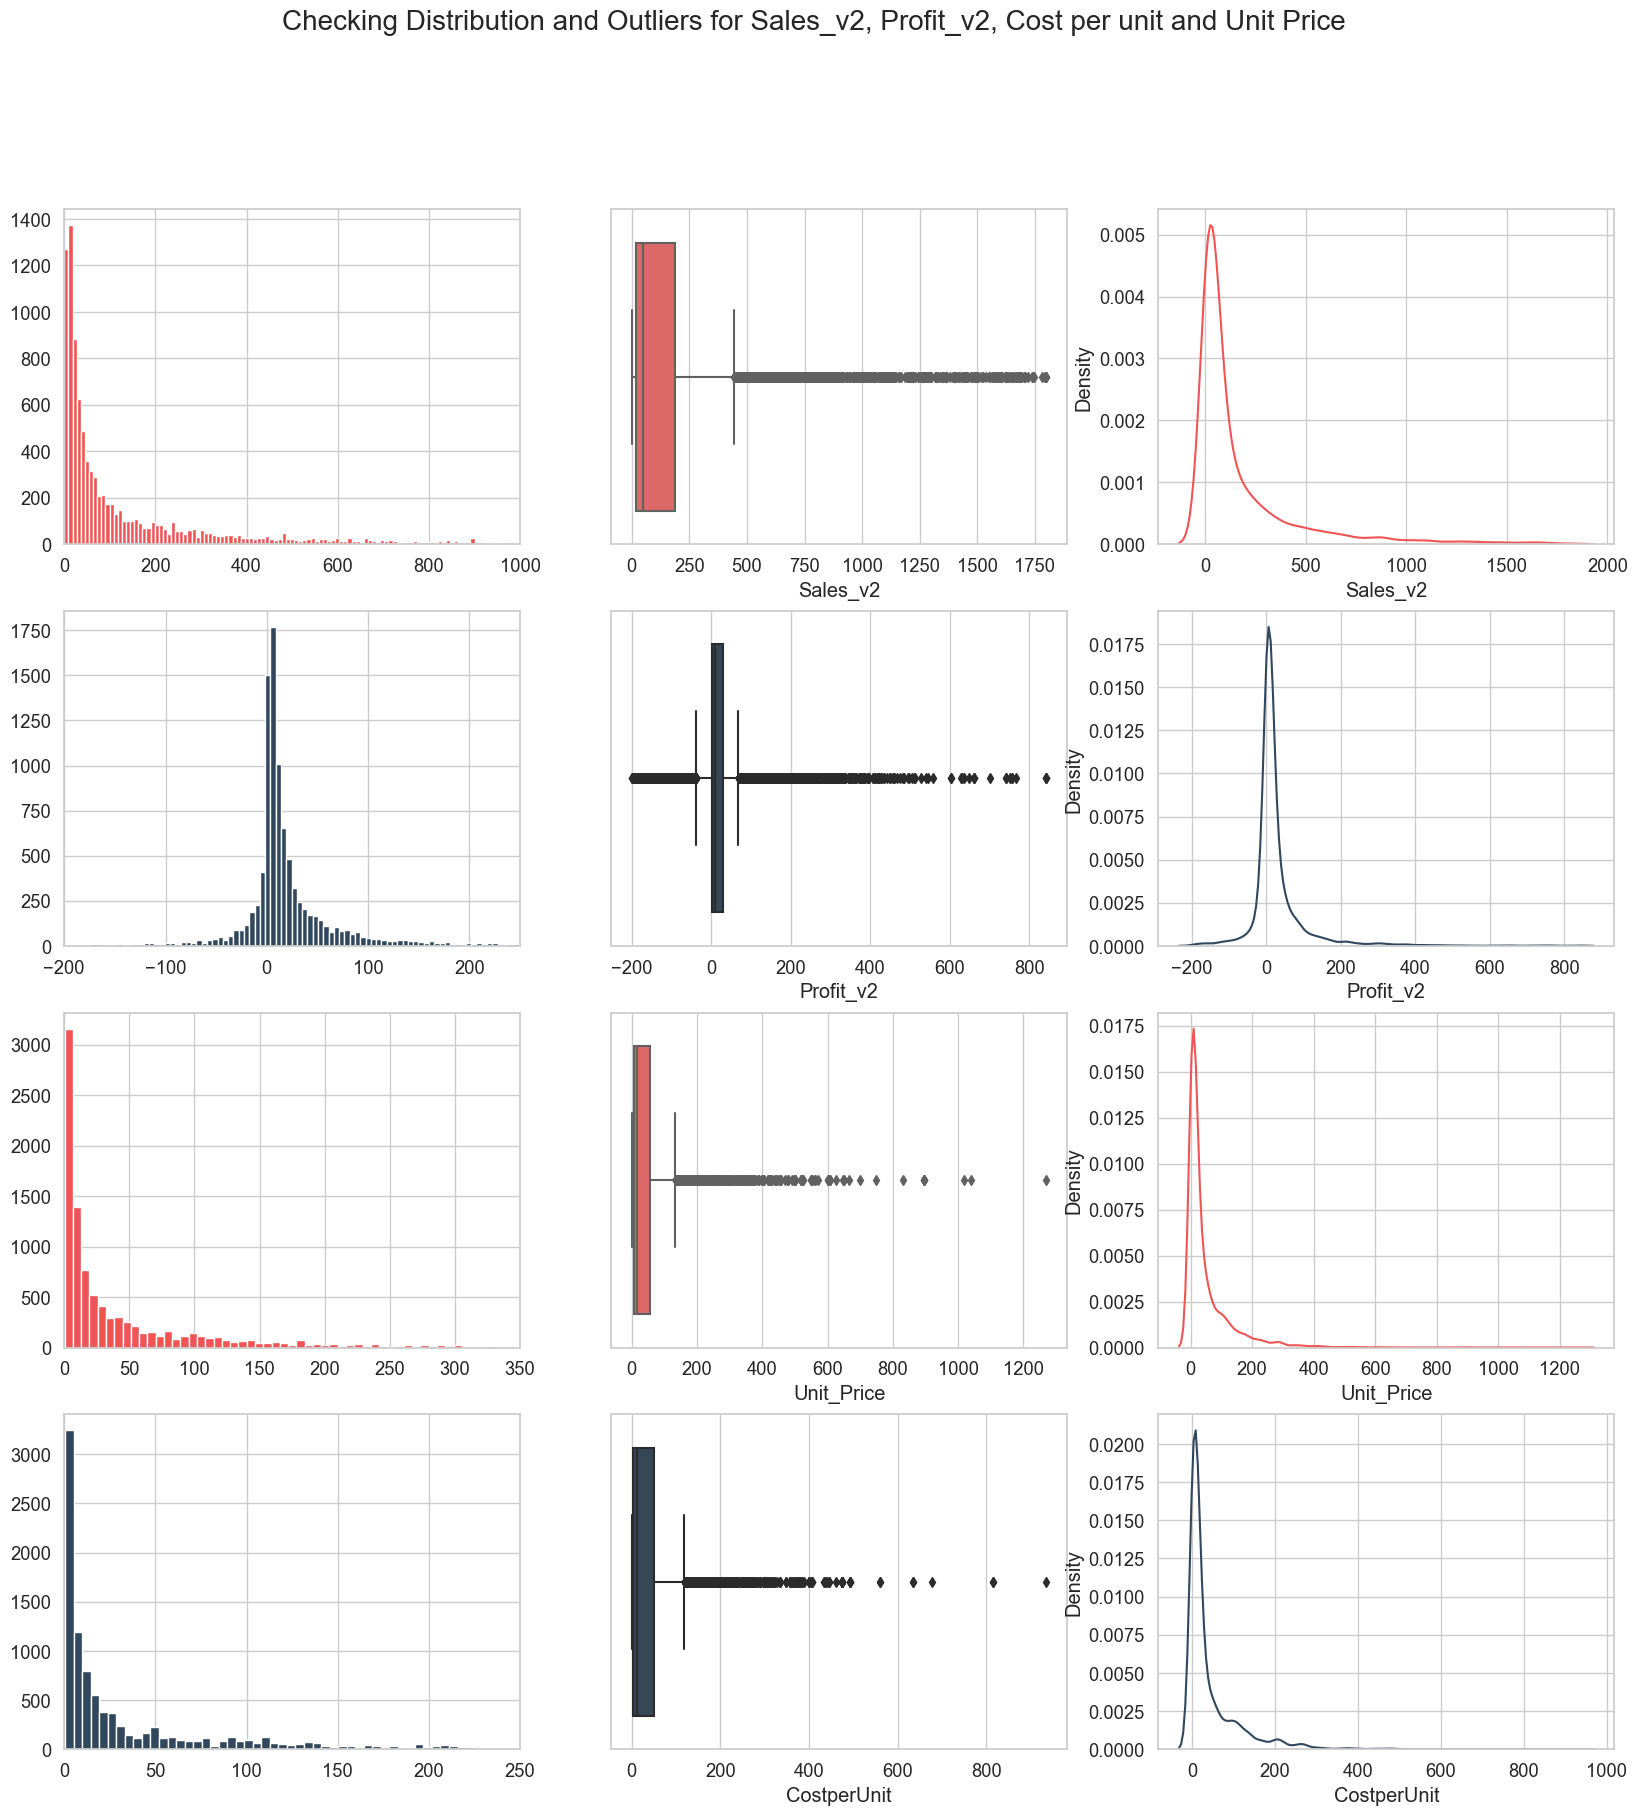

In [142]:
# Kolonlar için yeni bir frame oluşturuluyor


df_dist = df5[['Sales_v2', 'Profit_v2', 'Unit_Price', 'CostperUnit']]

################################################################
# Fixing 

df_dist = df_dist[df_dist['Sales_v2'] <= 1800]
df_dist = df_dist[df_dist['Profit_v2'] <= 2000]
df_dist = df_dist[df_dist['Profit_v2'] >= -200]
df_dist = df_dist[df_dist['Unit_Price'] <= 5000]
df_dist = df_dist[df_dist['Unit_Price'] >= -500]
df_dist = df_dist[df_dist['CostperUnit'] <= 50000]
df_dist = df_dist[df_dist['CostperUnit'] >= -500]

################################################################

# Visualizing the histograms
plt.figure(figsize=[20,20])

plt.suptitle("Checking Distribution and Outliers for Sales_v2, Profit_v2, Cost per unit and Unit Price", size=20)

# Histogram for Sales
plt.subplot(4,3,1)
plt.hist(df_dist['Sales_v2'], bins=200, color='#F05454')
plt.xlim(0,1000)

# Boxplot of  for Sales
plt.subplot(4,3,2)
sns.boxplot(df_dist['Sales_v2'], color='#F05454')

# KDEPlot for Sales
plt.subplot(4,3,3)
sns.kdeplot(x=df_dist['Sales_v2'], color='#F05454')

################################################################
# Histogram for Profit
plt.subplot(4,3,4)
plt.hist(df_dist['Profit_v2'], bins=200, color='#30475E')
plt.xlim(-200,250)

# Boxplot of  for Profit
plt.subplot(4,3,5)
sns.boxplot(df_dist['Profit_v2'], color='#30475E')

# KDEPlot for Profit
plt.subplot(4,3,6)
sns.kdeplot(x=df_dist['Profit_v2'], color='#30475E')

################################################################
# Histogram for Unit_Price
plt.subplot(4,3,7)
plt.hist(df_dist['Unit_Price'], bins=200, color='#F05454')
plt.xlim(0,350)

# Boxplot of  for Unit_Price
plt.subplot(4,3,8)
sns.boxplot(df_dist['Unit_Price'], color='#F05454')

# KDEPlot for Unit_Price
plt.subplot(4,3,9)
sns.kdeplot(x=df_dist['Unit_Price'], color='#F05454')

################################################################
# Histogram for CostperUnit
plt.subplot(4,3,10)
plt.hist(df_dist['CostperUnit'], bins=200, color='#30475E')
plt.xlim(0,250)

# Boxplot of  for CostperUnit
plt.subplot(4,3,11)
sns.boxplot(df_dist['CostperUnit'], color='#30475E')

# KDEPlot for CostperUnit
plt.subplot(4,3,12)
sns.kdeplot(x=df_dist['CostperUnit'], color='#30475E')


plt.show()

In [143]:
X = df5['Sales_v2']
X = sm.add_constant(X)
y = df5['Profit_v2']
model = sm.OLS(y, X).fit()
df5['predictions'] = model.predict(X)
fig = px.scatter(df5, x='Sales_v2', y='Profit_v2', trendline='ols', title='Satış ve Kar Arasındaki İlişki', labels={'Sales_v2': 'Satış', 'Profit_v2': 'Kar'}, color_discrete_sequence=['blue'])
fig.update_layout(xaxis_title='Satış', yaxis_title='Kar', title_x=0.5, title_font=dict(size=20), width=800, height=600)
fig.show()

In [144]:
X = df5['Sales_v2']
X = sm.add_constant(X)
y = df5['Unit_Price']
model = sm.OLS(y, X).fit()
df4['predictions'] = model.predict(X)
fig = px.scatter(df5, x='Sales_v2', y='Unit_Price', trendline='ols', title='Satış ve Fiyat Arasındaki İlişki', labels={'Sales_v2': 'Satış', 'Unit_Price': 'Fiyat'}, color_discrete_sequence=['blue'])
fig.update_layout(xaxis_title='Satış', yaxis_title='Fiyat', title_x=0.5, title_font=dict(size=20), width=800, height=600)
fig.show()

Scatter Plot dağılımı
Pozitif İlişki: Satış arttıkça kar da fiyatta artıyor.

Lineer Regresyon Çizgisi
Pozitif Eğim: Yukarıya doğru eğimli.Sabit metrik arttıkça diğer metriklerde artınca gerçekleşiyor.

R-Kare (R²) Değeri
Lineer regresyon analizinde, R² değeri, bağımsız değişkenin bağımlı değişkeni ne kadar iyi açıkladığını gösterir.

Yüksek R² Değeri (0.7 ve üstü): sales değişkeninin profit'i yüksek oranda açıkladığını gösterir. Satıştaki değişimlerin büyük bir kısmı kâr üzerindeki değişimleri açıklar. Düşük R² Değeri (0.3 ve altı): sales değişkeninin profit'i düşük oranda açıkladığını gösterir. Kâr üzerindeki değişimlerin çoğu, satıştaki değişimlerden kaynaklanmaz ve başka faktörlerden etkileniyor olabilir.

Korelasyon
Korelasyon katsayısı, iki değişken arasındaki doğrusal ilişkiyi sayısal olarak ifade eder. -1 ile 1 arasında değer alır.

Pozitif Korelasyon (0 ile 1 arasında): sales ve profit arasında pozitif bir ilişki vardır. Yani satış arttıkça, kâr da artar. Negatif Korelasyon (-1 ile 0 arasında): sales ve profit arasında negatif bir ilişki vardır. Yani satış arttıkça, kâr azalır. Korelasyon Yok (0'a yakın): sales ve profit arasında belirgin bir doğrusal ilişki yoktur.

Hata Terimleri ve Sapmalar
Regresyon modelinin doğruluğu, hata terimlerinin dağılımına bağlıdır.

Homojen Dağılım: Hata terimleri rastgele dağılmışsa, modeliniz veri seti üzerinde iyi bir uyum sağlıyor demektir. Heterojen Dağılım: Hata terimleri belirli bir pattern gösteriyorsa, modelinizde eksik veya hatalı bir değişken olabilir.

Chat gpt yorumları

Eğer scatter plot üzerindeki veri noktaları ve regresyon çizgisi pozitif bir ilişki gösteriyorsa, satış arttıkça kârın da arttığı sonucuna ulaşabiliriz. Bu, iş stratejilerinizin başarılı olduğunu ve daha yüksek satışların daha fazla kar getirdiğini gösterir.

Eğer negatif bir ilişki veya düzensiz bir dağılım görüyorsanız, bu durumda fiyatlandırma stratejilerini, maliyetleri veya ürün yelpazesini gözden geçirmeniz gerekebilir.

R² değeri düşükse, kâr üzerindeki diğer faktörleri incelemeniz gerekebilir. Bu faktörler arasında pazarlama harcamaları, müşteri memnuniyeti, rekabet durumu gibi değişkenler olabilir.

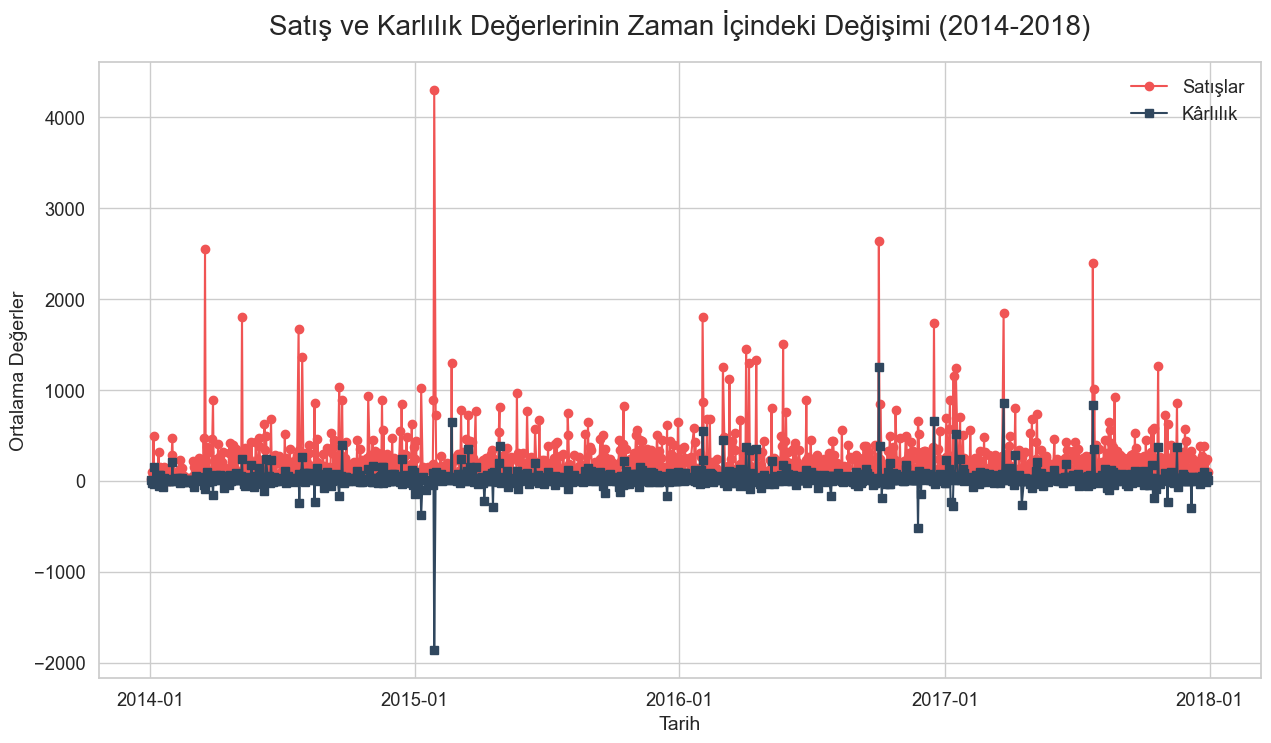

In [145]:
# Veri çerçevesini ve tarihi hazırlama
df_line = df5[['Order_Date', 'Sales_v2', 'Profit_v2']].sort_values('Order_Date')
df_line['Order_Date'] = pd.to_datetime(df_line['Order_Date'])
df_line = df_line.groupby('Order_Date').mean()

# Grafik oluşturma
plt.figure(figsize=[15, 8])

# Satışlar ve kâr çizgilerini çizme
plt.plot(df_line.index, df_line['Sales_v2'], color='#F05454', marker='o', label='Satışlar')
plt.plot(df_line.index, df_line['Profit_v2'], color='#30475E', marker='s', label='Kârlılık')

# Başlık ve etiketler
plt.title("Satış ve Karlılık Değerlerinin Zaman İçindeki Değişimi (2014-2018)", size=20, pad=20)
plt.xlabel('Tarih', size=14)
plt.ylabel('Ortalama Değerler', size=14)

# Tarih eksenini biçimlendirme
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

# Grid ekleme
plt.grid(True)

# Lejant ekleme
plt.legend()

# Grafik gösterme
plt.show()

In [146]:
region_sales_profit = df5.groupby(['Region'])[['Sales_v2', 'Profit_v2']].sum()

fig2 = go.Figure()

fig2.add_trace(go.Bar(y=region_sales_profit.index, x=region_sales_profit['Sales_v2'], name='Satış', orientation='h'))
fig2.add_trace(go.Bar(y=region_sales_profit.index, x=region_sales_profit['Profit_v2'], name='Kar', orientation='h'))
fig2.update_layout(title='Bölgeye Göre Satış ve Kar', xaxis_title='Değerler', yaxis_title='Bölgeler', barmode='stack', width=800, height=600)

fig2.show()

fig3 = px.imshow(region_sales_profit, labels=dict(x="Özellikler", y="Bölgeler", color="Değer"), x=['Sales_v2', 'Profit_v2'], y=region_sales_profit.index, color_continuous_scale='Blackbody')

fig3.update_layout(title='Bölgeye Göre Satış ve Kar Isı Haritası', xaxis_title='Özellikler', yaxis_title='Bölgeler', coloraxis_colorbar=dict(title='Değer'), width=800, height=600)

fig3.show()
